In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, multivariate_t, chi2
import DyGraph as dg
from sklearn.preprocessing import StandardScaler
import tqdm
import seaborn as sns
import networkx as nx
import pandas as pd
import requests
import geopandas as gpd

In [3]:
date:  -  00 to 00 utc
rain:  -  Precipitation Amount (mm)
"maxtp: -  Maximum Air Temperature (C)	  "
mintp: -  Minimum  Air Temperature (C)
gmin:  -  09utc Grass Minimum Temperature (C)
"soil:  -  Mean 10cm soil temperature (C)	"
cbl:   -  Mean CBL Pressure (hpa)
wdsp:  -  Mean Wind Speed (kt)
"hm:    -  Highest ten minute mean wind speed (kt)		                 "
ddhm:  -  Wind Direction at max 10 min mean (deg)                  
hg:    -  Highest Gust (kt)
pe:    -  Potential Evapotranspiration (mm)  
evap:  -  Evaporation (mm)
smd_wd:-  Soil Moisture Deficits(mm) well drained
smd_md:-  Soil Moisture Deficits(mm) moderately drained
smd_pd:-  Soil Moisture Deficits(mm) poorly drained
glorad:-  Global Radiation (J/cm sq.)
ind:   -  Indicator (i)


SyntaxError: invalid syntax (1266414402.py, line 1)

In [139]:

donegal = pd.read_csv("../data/soil_tmp/donegal.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
donegal['date'] = pd.to_datetime(donegal['date'])
donegal['NAME_1'] = 'Donegal'
donegal['soil']

C:\Users\User\AppData\Local\Temp\ipykernel_12072\3424608427.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  donegal['date'] = pd.to_datetime(donegal['date'])


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
29732   NaN
29733   NaN
29734   NaN
29735   NaN
29736   NaN
Name: soil, Length: 29737, dtype: float64

In [140]:
carlow = pd.read_csv("../data/soil_tmp/carlow.csv", sep = ",", na_values= ' ')
carlow['date'] = pd.to_datetime(carlow['date'])
carlow['NAME_1'] = 'Carlow'

cavan = pd.read_csv("../data/soil_tmp/Cavan.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(24)])
cavan['date'] = pd.to_datetime(cavan['date'])
cavan['NAME_1'] = 'Cavan'

clare = pd.read_csv("../data/soil_tmp/clare.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(24)])
clare['date'] = pd.to_datetime(clare['date'])
clare['NAME_1'] = 'Clare'

cork = pd.read_csv("../data/soil_tmp/cork.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(24)])
cork['date'] = pd.to_datetime(cork['date'])
cork['NAME_1'] = 'Cork'

donegal = pd.read_csv("../data/soil_tmp/donegal.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
donegal['date'] = pd.to_datetime(donegal['date'])
donegal['NAME_1'] = 'Donegal'

dublin = pd.read_csv("../data/soil_tmp/dublin.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(24)])
dublin['date'] = pd.to_datetime(dublin['date'])
dublin['NAME_1'] = 'Dublin'

dunsany = pd.read_csv("../data/soil_tmp/dunsany.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(24)])
dunsany['date'] = pd.to_datetime(dunsany['date'])
dunsany['NAME_1'] = 'Dunsany'

galway = pd.read_csv("../data/soil_tmp/galway.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(24)])
galway['date'] = pd.to_datetime(galway['date'])
galway['NAME_1'] = 'Galway'

kerry = pd.read_csv("../data/soil_tmp/kerry.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
kerry['date'] = pd.to_datetime(kerry['date'])
kerry['NAME_1'] = 'Kerry'

kildare = pd.read_csv("../data/soil_tmp/kildare.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
kildare['date'] = pd.to_datetime(kildare['date'])
kildare['NAME_1'] = 'Kildare'

kilkenny = pd.read_csv("../data/soil_tmp/kilkenny.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
kilkenny['date'] = pd.to_datetime(kilkenny['date'])
kilkenny['NAME_1'] = 'Kilkenny'

laois = pd.read_csv("../data/soil_tmp/laois.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
laois['date'] = pd.to_datetime(laois['date'])
laois['NAME_1'] = 'Laoighis'

leitrim = pd.read_csv("../data/soil_tmp/leitrim.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
leitrim['date'] = pd.to_datetime(leitrim['date'])
leitrim['NAME_1'] = 'Leitrim'


limerick = pd.read_csv("../data/soil_tmp/limerick.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
limerick['date'] = pd.to_datetime(limerick['date'])
limerick['NAME_1'] = 'Limerick'

longford = pd.read_csv("../data/soil_tmp/longford.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
longford['date'] = pd.to_datetime(longford['date'])
longford['NAME_1'] = 'Longford'

mayo = pd.read_csv("../data/soil_tmp/mayo.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(24)])
mayo['date'] = pd.to_datetime(mayo['date'])
mayo['NAME_1'] = 'Mayo'

meath = pd.read_csv("../data/soil_tmp/meath.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
meath['date'] = pd.to_datetime(meath['date'])
meath['NAME_1'] = 'Meath'

monaghan = pd.read_csv("../data/soil_tmp/monaghan.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
monaghan['date'] = pd.to_datetime(monaghan['date'])
monaghan['NAME_1'] = 'Monaghan'

offaly = pd.read_csv("../data/soil_tmp/offaly.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
offaly['date'] = pd.to_datetime(offaly['date'])
offaly['NAME_1'] = 'Offaly'


roscommon = pd.read_csv("../data/soil_tmp/roscommon.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(24)])
roscommon['date'] = pd.to_datetime(roscommon['date'])
roscommon['NAME_1'] = 'Roscommon'

sligo = pd.read_csv("../data/soil_tmp/sligo.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
sligo['date'] = pd.to_datetime(sligo['date'])
sligo['NAME_1'] = 'Sligo'

tipperary = pd.read_csv("../data/soil_tmp/Tipperary.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(24)])
tipperary['date'] = pd.to_datetime(tipperary['date'])
tipperary['NAME_1'] = 'Tipperary'

waterford = pd.read_csv("../data/soil_tmp/waterford.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
waterford['date'] = pd.to_datetime(waterford['date'])
waterford['NAME_1'] = 'Waterford'

westmeath = pd.read_csv("../data/soil_tmp/westmeath.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(24)])
westmeath['date'] = pd.to_datetime(westmeath['date'])
westmeath['NAME_1'] = 'Westmeath'

wexford = pd.read_csv("../data/soil_tmp/wexford.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
wexford['date'] = pd.to_datetime(wexford['date'])
wexford['NAME_1'] = 'Wexford'

wicklow = pd.read_csv("../data/soil_tmp/wicklow.csv", sep = ",", na_values= ' ', skiprows=[i for i in range(13)])
wicklow['date'] = pd.to_datetime(wicklow['date'])
wicklow['NAME_1'] = 'Wicklow'

C:\Users\User\AppData\Local\Temp\ipykernel_12072\20064375.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  carlow['date'] = pd.to_datetime(carlow['date'])
C:\Users\User\AppData\Local\Temp\ipykernel_12072\20064375.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cavan['date'] = pd.to_datetime(cavan['date'])
C:\Users\User\AppData\Local\Temp\ipykernel_12072\20064375.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clare['date'] = pd.to_datetime(clare['date'])
C:\Users\User\AppData\Local\Temp\ipykernel_12072\20064375.py:14: UserWarning: Could not infer format, so each

In [141]:
from functools import reduce
df_merged = pd.concat([carlow, cavan, clare, cork, donegal, dublin, dunsany, galway, kerry, kildare, kilkenny, laois, 
                       leitrim, limerick, longford, meath, monaghan, offaly, sligo, waterford, wexford, 
                       mayo, roscommon, tipperary, westmeath, wicklow ])

In [142]:
import geopandas as gpd
shape_in = gpd.read_file('../data/soil/IRL_adm/IRL_adm1.shp')
shape_in.head()


,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,109,IRL,Ireland,1,Carlow,Administrative County,County,NaN,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730..."
1,109,IRL,Ireland,2,Cavan,Administrative County,County,NaN,An Cabhán,"POLYGON ((-7.27517 53.78388, -7.27538 53.78377..."
2,109,IRL,Ireland,3,Clare,Administrative County,County,NaN,An Clár,"MULTIPOLYGON (((-9.04528 52.71819, -9.04528 52..."
3,109,IRL,Ireland,4,Cork,Traditional County,County,NaN,Corcaigh,"MULTIPOLYGON (((-10.16361 51.57986, -10.16528 ..."
4,109,IRL,Ireland,5,Donegal,Administrative County,County,NaN,Dún na nGall|Tyrconnel,"MULTIPOLYGON (((-7.24083 55.44958, -7.24078 55..."


In [126]:
shape_in_mean = pd.merge(shape_in, df_merged.groupby('NAME_1').mean(), on = 'NAME_1', how = 'inner')

In [144]:
donegal['soil']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
29732   NaN
29733   NaN
29734   NaN
29735   NaN
29736   NaN
Name: soil, Length: 29737, dtype: float64

In [166]:
df_merged.loc[df_merged['date'] == datetime.datetime(2020,9,1)][['NAME_1', 'gmin']].groupby('NAME_1').mean(   )

,gmin
NAME_1,
Carlow,7.6
Cavan,11.8
Clare,13.2
Cork,12.9
Donegal,9.3
Dublin,6.1
Dunsany,12.7
Galway,13.0
Kerry,11.5


In [131]:
longford

,date,ind,rain,ind.1,maxt,ind.2,mint,gmin,soil,NAME_1
0,1964-12-01,0,0.7,NaN,NaN,NaN,NaN,NaN,NaN,Longford
1,1964-12-02,0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,Longford
2,1964-12-03,0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,Longford
3,1964-12-04,0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,Longford
4,1964-12-05,0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,Longford
...,...,...,...,...,...,...,...,...,...,...
18042,2019-06-26,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Longford
18043,2019-06-27,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Longford
18044,2019-06-28,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Longford
18045,2019-06-29,0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,Longford


In [123]:
shape_in_mean['NAME_1']

0        Carlow
1         Cavan
2         Clare
3          Cork
4       Donegal
5        Dublin
6        Galway
7         Kerry
8       Kildare
9      Kilkenny
10      Leitrim
11     Limerick
12     Longford
13         Mayo
14        Meath
15     Monaghan
16       Offaly
17    Roscommon
18        Sligo
19    Tipperary
20    Waterford
21    Westmeath
22      Wexford
23      Wicklow
Name: NAME_1, dtype: object

In [120]:
np.unique(df_merged['NAME_1'])

array(['Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Dunsany',
       'Galway', 'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim',
       'Limerick', 'Longford', 'Mayo', 'Meath', 'Monaghan', 'Offaly',
       'Roscommon', 'Sligo', 'Tipperary', 'Waterford', 'Westmeath',
       'Wexford', 'Wicklow'], dtype=object)

In [187]:
df_merged['date'].dt.year

0        2003
1        2003
2        2003
3        2003
4        2003
         ... 
10832    2018
10833    2018
10834    2018
10835    2018
10836    2018
Name: date, Length: 352161, dtype: int32

<AxesSubplot: xlabel='yearmonth'>

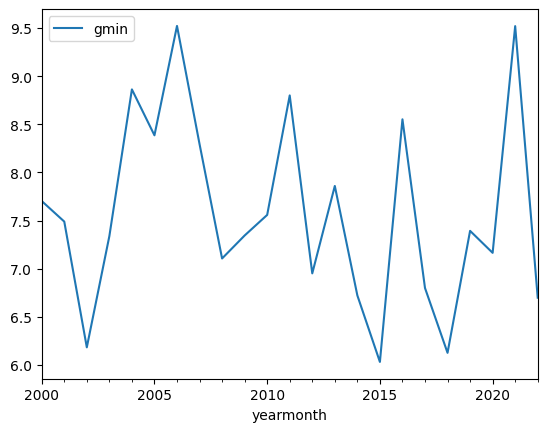

In [196]:
df_merged['yearmonth'] = pd.to_datetime(df_merged['date'].dt.year.astype(str) + '/' + df_merged['date'].dt.month.astype(str) + '/01')
df_merged[['yearmonth','gmin']].loc[(df_merged['yearmonth']>=datetime.datetime(2000,1,1)) & (df_merged['yearmonth'].dt.month == 9)].groupby('yearmonth').mean().plot()

In [174]:
cnt

3

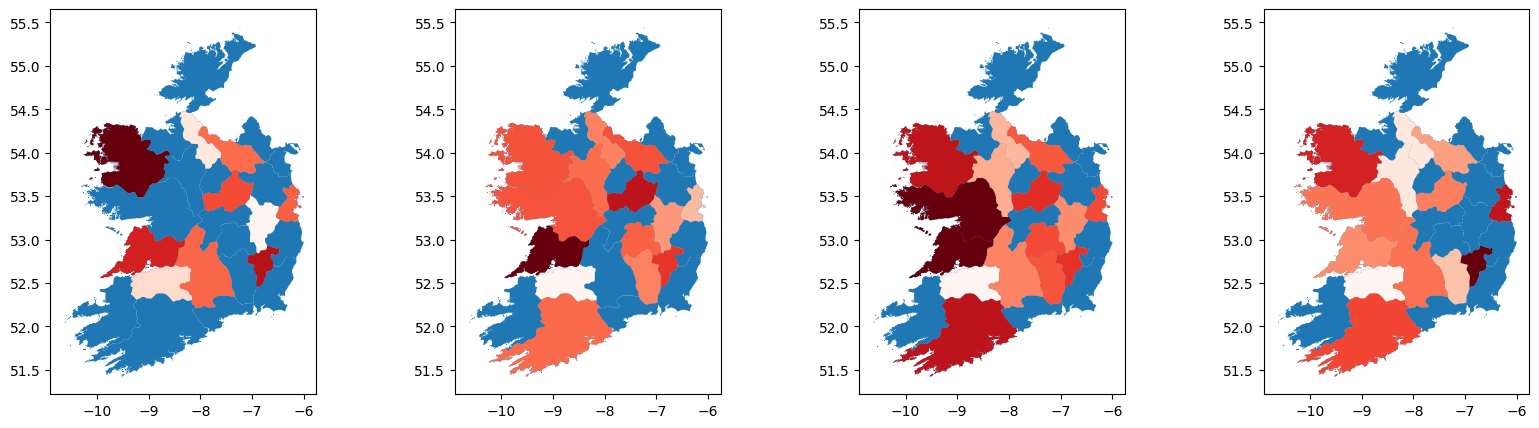

In [177]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
import datetime
for cnt, year in enumerate([2010, 2015, 2020, 2022]):
    shape_in_mean = pd.merge(shape_in, df_merged.loc[df_merged['date'] == datetime.datetime(year,9,1)].groupby('NAME_1').mean(), on = 'NAME_1', how = 'inner')
    shape_in.plot(ax = ax[cnt])
    shape_in_mean.plot(cmap = 'Reds', column = 'soil', ax = ax[cnt])
    #bar_info = plt.cm.ScalarMappable(cmap="Reds")
    # bar_info._A = []
    #cbar = fig.colorbar(bar_info)

In [162]:
df_merged.loc[df_merged['date'] == datetime.datetime(2010,9,1)][['soil']]

,soil
2506,17.045
2500,15.432
23741,16.550
2514,NaN
25414,NaN
25080,15.600
1575,NaN
187,NaN
11049,NaN
6210,13.000


C:\Users\User\AppData\Local\Temp\ipykernel_12072\2899738413.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info)


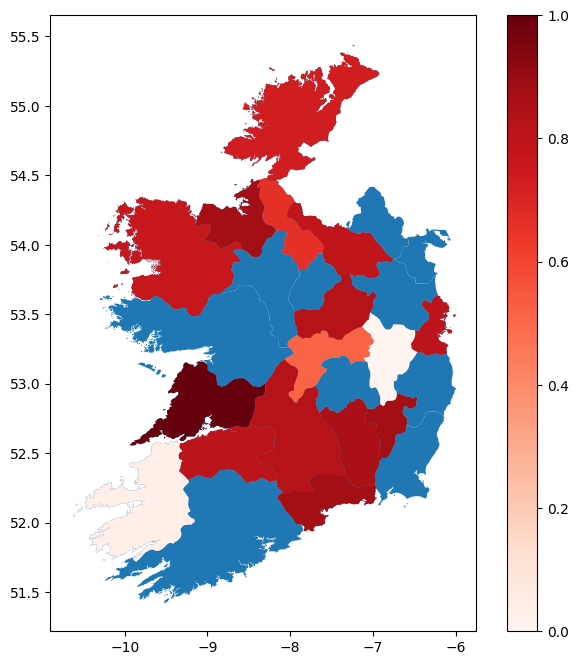

In [159]:
fig, ax = plt.subplots(1, figsize=(8, 8))


shape_in_mean = pd.merge(shape_in, df_merged.loc[df_merged['date'] == datetime.datetime(2010,7,1)].groupby('NAME_1').mean(), on = 'NAME_1', how = 'inner')

shape_in.plot(ax = ax)
shape_in_mean.plot(cmap = 'Reds', column = 'gmin', ax = ax)
bar_info = plt.cm.ScalarMappable(cmap="Reds")
# bar_info._A = []
cbar = fig.colorbar(bar_info)

In [6]:
pd.to_datetime(carlow['date'])

C:\Users\User\AppData\Local\Temp\ipykernel_12072\3794234025.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(carlow['date'])


0      2003-08-13
1      2003-08-14
2      2003-08-15
3      2003-08-16
4      2003-08-17
          ...    
7093   2023-03-27
7094   2023-03-28
7095   2023-03-29
7096   2023-03-30
7097   2023-03-31
Name: date, Length: 7098, dtype: datetime64[ns]

In [156]:
np.exp(-np.linspace(3.5, 1.5,10))

array([0.03019738, 0.03771197, 0.04709655, 0.05881647, 0.07345288,
       0.09173155, 0.11455884, 0.14306668, 0.17866866, 0.22313016])

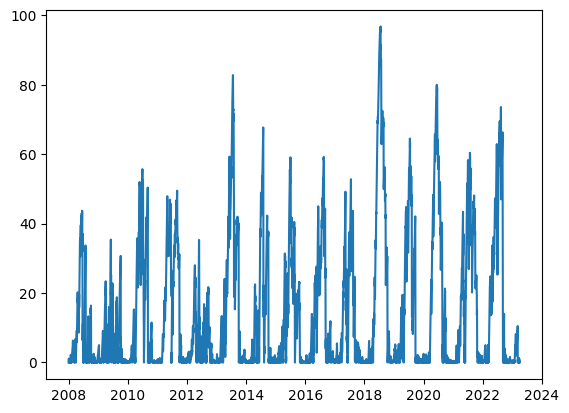

In [155]:
plt.plot(carlow['date'], carlow['smd_wd'])